# 01 Analyzing exam scores

## 📖 01.01 Background

Your best friend is an administrator at a large school. The school makes every student take year-end math, reading, and writing exams.

Since you have recently learned data manipulation and visualization, you suggest helping your friend analyze the score results. The school's principal wants to know if test preparation courses are helpful. She also wants to explore the effect of parental education level on test scores. 

## 💾 01.02 The data

#### The file has the following fields ([source](http://roycekimmons.com/tools/generated_data/exams)):
- "gender" - male / female
- "race/ethnicity" - one of 5 combinations of race/ethnicity
- "parent_education_level" -  highest education level of either parent
- "lunch" - whether the student receives free/reduced or standard lunch
- "test_prep_course" - whether the student took the test preparation course
- "math" -  exam score in math 
- "reading" -  exam score in reading 
- "writing" -  exam score in writing 

## 💪 01.03 Challenge

Create a report to answer the principal's questions. Include:

1. What are the average reading scores for students with/without the test preparation course?
2. What are the average scores for the different parental education levels?
3. Create plots to visualize findings for questions 1 and 2.
4. [Optional] Look at the effects within subgroups. Compare the average scores for students with/without the test preparation course for different parental education levels (e.g., faceted plots).
5. [Optional 2] The principal wants to know if kids who perform well on one subject also score well on the others. Look at the correlations between scores. 
6. Summarize your findings.

# 02 Data Checking & Preperation

As a data analyst, always the first step in any project is to take a look into our data, we will check for missing, duplications and wrong values, if we have any we will take an action as per the situation.

## 02.01 Importing Modules & Set Plots' Parameters

In [1]:
# Import Modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot size, style, context and palette
plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('fivethirtyeight')
sns.set_context('talk')
sns.set_palette('colorblind')

## 02.02 Loading the Dataset

In [2]:
# import dataset
df = pd.read_csv('data/exams.csv')

# lets see the first 5 rows
df.head()

,gender,race/ethnicity,parent_education_level,lunch,test_prep_course,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## 02.03 Checking for Missing and Duplicated Values

In [3]:
# Using info , we will check for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   gender                  1000 non-null   object
 1   race/ethnicity          1000 non-null   object
 2   parent_education_level  1000 non-null   object
 3   lunch                   1000 non-null   object
 4   test_prep_course        1000 non-null   object
 5   math                    1000 non-null   int64 
 6   reading                 1000 non-null   int64 
 7   writing                 1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
df.duplicated().sum()

0

**No missing nor duplicated rows**, let us move to values inside the rows.

## 02.04 Checking the Categorial Columns

We have categorial columns here (even if the type is not categorial), what we mean by categorial is that these columns should have finite values.  

Sometimes the values will have spelling mistakes or case different specially if it had typed manually, as we have the correct values of the columns from section **01.02**, we will use `unique` function in every column to compare the values with the values given in section **01.02**.  

The columns which we will check are:
- gender
- race/ethnicity
- parent_education_level
- lunch
- test_prep_course

In [5]:
# Put the categorial column names in cat_cols list
cat_cols = ['gender', 'race/ethnicity', 'parent_education_level','lunch', 'test_prep_course']

# iterate through each column and print the unique values
for col in cat_cols:
    print (col, ' :', df[col].unique(), '\n')

gender  : ['female' 'male'] 

race/ethnicity  : ['group B' 'group C' 'group A' 'group D' 'group E'] 

parent_education_level  : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'] 

lunch  : ['standard' 'free/reduced'] 

test_prep_course  : ['none' 'completed'] 



**All values are as expected**, we will move to the numerical columns.

## 02.05 Checking the Numarical Columns

We have three columns that has numarical values, these columns contains students' score in exams, what we are looking here is that the **score should be a number between 0 and 100.**  

We will use `describe` to see the statistical summery of the columns, we will focus on the `min` and `max` values.

The numarical columns which we will check are:
- math
- reading
- writing

In [6]:
df.describe()

,math,reading,writing
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**All values are as expected**, we can start now EDA.  

**Importent note**: It seems like all this section is useless, this happened because the dataset is perfectly created for educational perpose, this is not the case of most real projects, so as data analyst, you should start with this step to make sure that the results which you will get are accurate.

# 03 Exploratory Data Analysis

We will answer the questions in section **01.03** one by one

## 03.01 What are the average reading scores for students with/without the test preparation course?

To get the average score of `reading` exam as per `test_prep_course`, we will `groupby` the `test_prep_course` then choose `reading` column and apply the `mean` function of values, we will save results in `df_reading`.

In [7]:
df_reading = df.groupby('test_prep_course')[['reading']].mean()
df_reading

,reading
test_prep_course,
completed,73.893855
none,66.534268


## 03.02 What are the average scores for the different parental education levels?

To get the average score of all exams as per `parent_education_level`, we will `groupby` the `parent_education_level` then choose `math`, `reading`, and `writing` columns and apply the `mean` function of values, we will save results in `df_parent_edu`.

In [8]:
df_parent_edu = df.groupby('parent_education_level')[['math', 'reading', 'writing']].mean()
df_parent_edu

,math,reading,writing
parent_education_level,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


## 03.03 Create plots to visualize findings for questions 1 and 2.

### 03.03.01 Visualization of Average Reading Scores with and without the Test Preperation Course

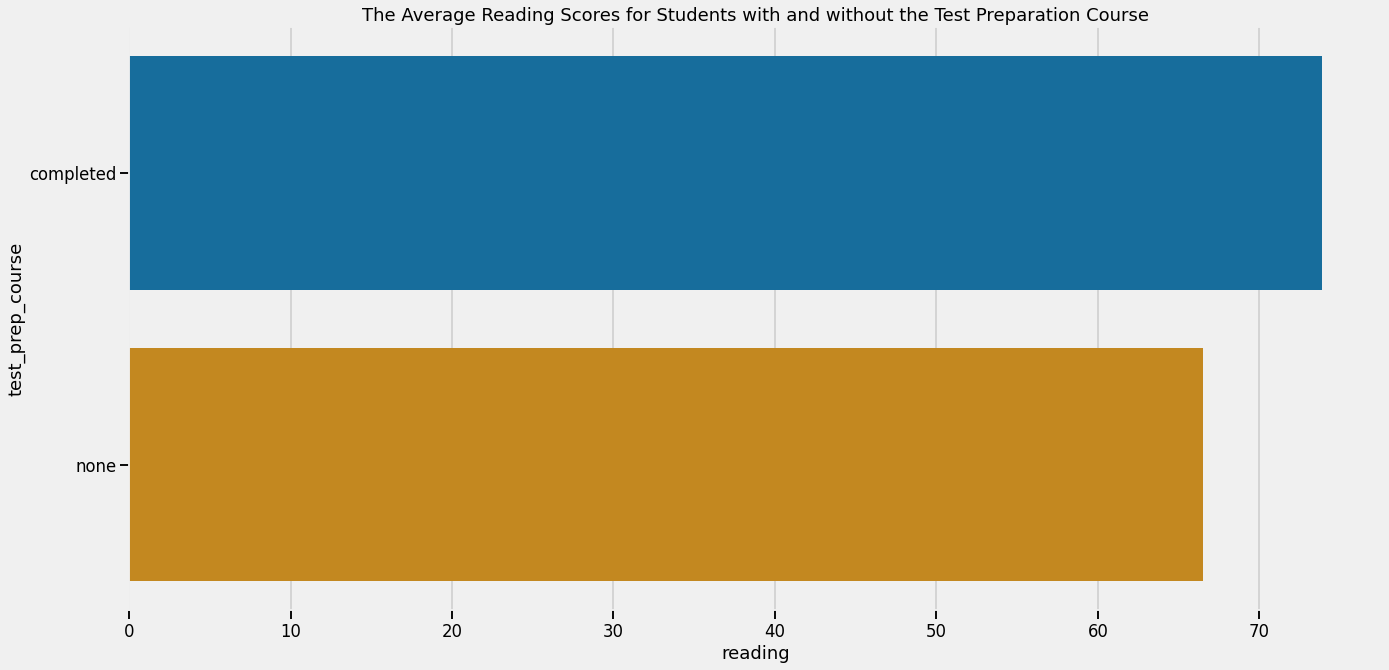

In [9]:
# We will plot a bar plot
sns.barplot(y=df_reading.index, x='reading', data=df_reading)

# Set title and show plot
plt.title('The Average Reading Scores for Students with and without the Test Preparation Course')
plt.show()

### 03.03.02 Visualization of Average Scores for Different Parental Education Levels

I would like here to show the scores for every exam with every education level, to make it easire, we will use the `melt` function to create a new long dataframe from `df_parent_edu` and we will save it in `df_parent_melted`. 

In [10]:
df_parent_melted = df_parent_edu.melt(var_name='exam', value_name='score', 
                                      ignore_index=False).reset_index()
# Sort descending by score
df_parent_melted.sort_values('score', ascending=False)

df_parent_melted.head()

,parent_education_level,exam,score
0,associate's degree,math,67.882883
1,bachelor's degree,math,69.389831
2,high school,math,62.137755
3,master's degree,math,69.745763
4,some college,math,67.128319


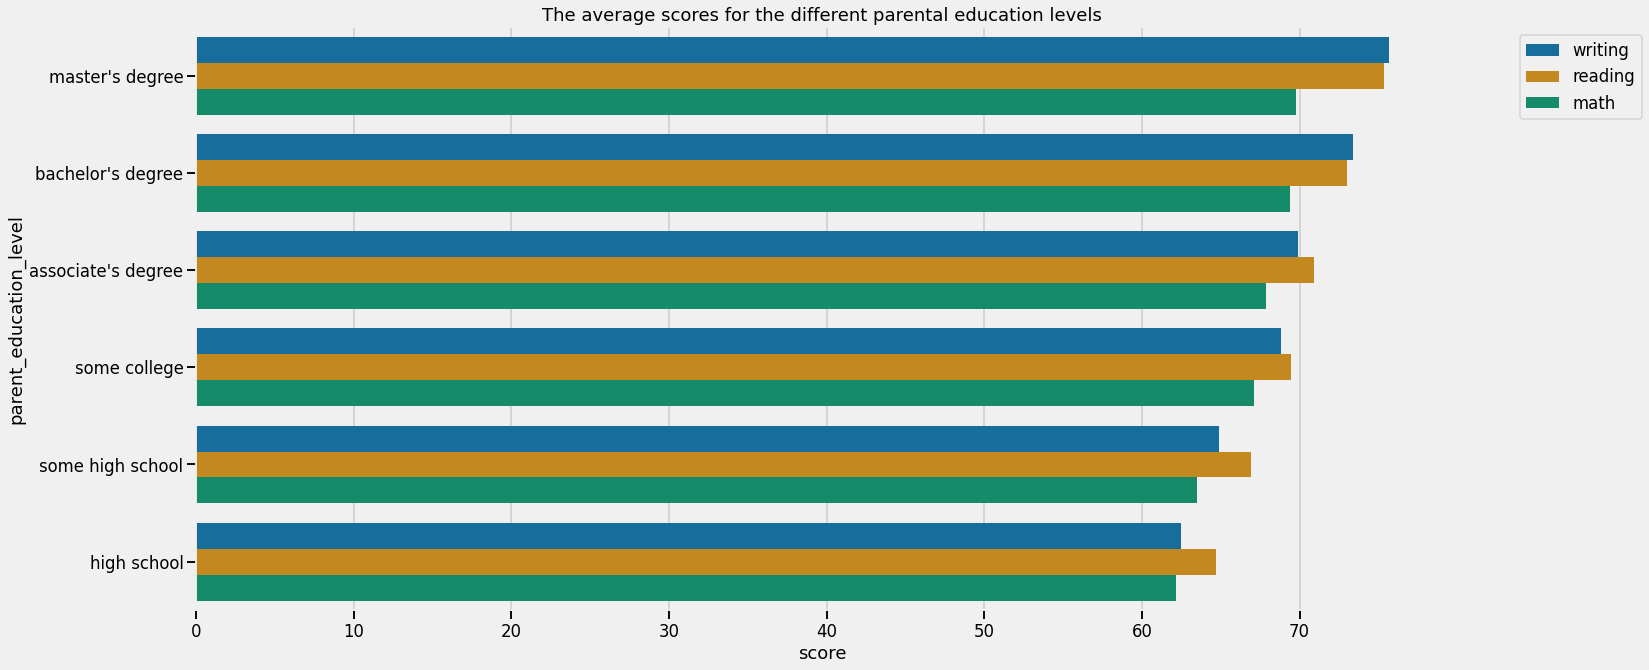

In [11]:
# Make a bar plot 
sns.barplot(x='score', y='parent_education_level', hue='exam',
            data=df_parent_melted.sort_values('score', ascending=False))

# Set plot title
plt.title('The average scores for the different parental education levels')

# move legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

## 03.04 Look at the effects within subgroups. Compare the average scores for students with/without the test preparation course for different parental education levels (e.g., faceted plots).

We can `melt` our dataset then use `catplot` to make plots for every `exam` with every `parent_education_level`, we will use `test_prep_course` as `hue`.

In [12]:
df_scores = pd.melt(df, id_vars=['parent_education_level', 'test_prep_course'],
                    value_vars=['math', 'reading', 'writing'], var_name='exam',
                    value_name='score')


df_scores.head()

,parent_education_level,test_prep_course,exam,score
0,bachelor's degree,none,math,72
1,some college,completed,math,69
2,master's degree,none,math,90
3,associate's degree,none,math,47
4,some college,none,math,76


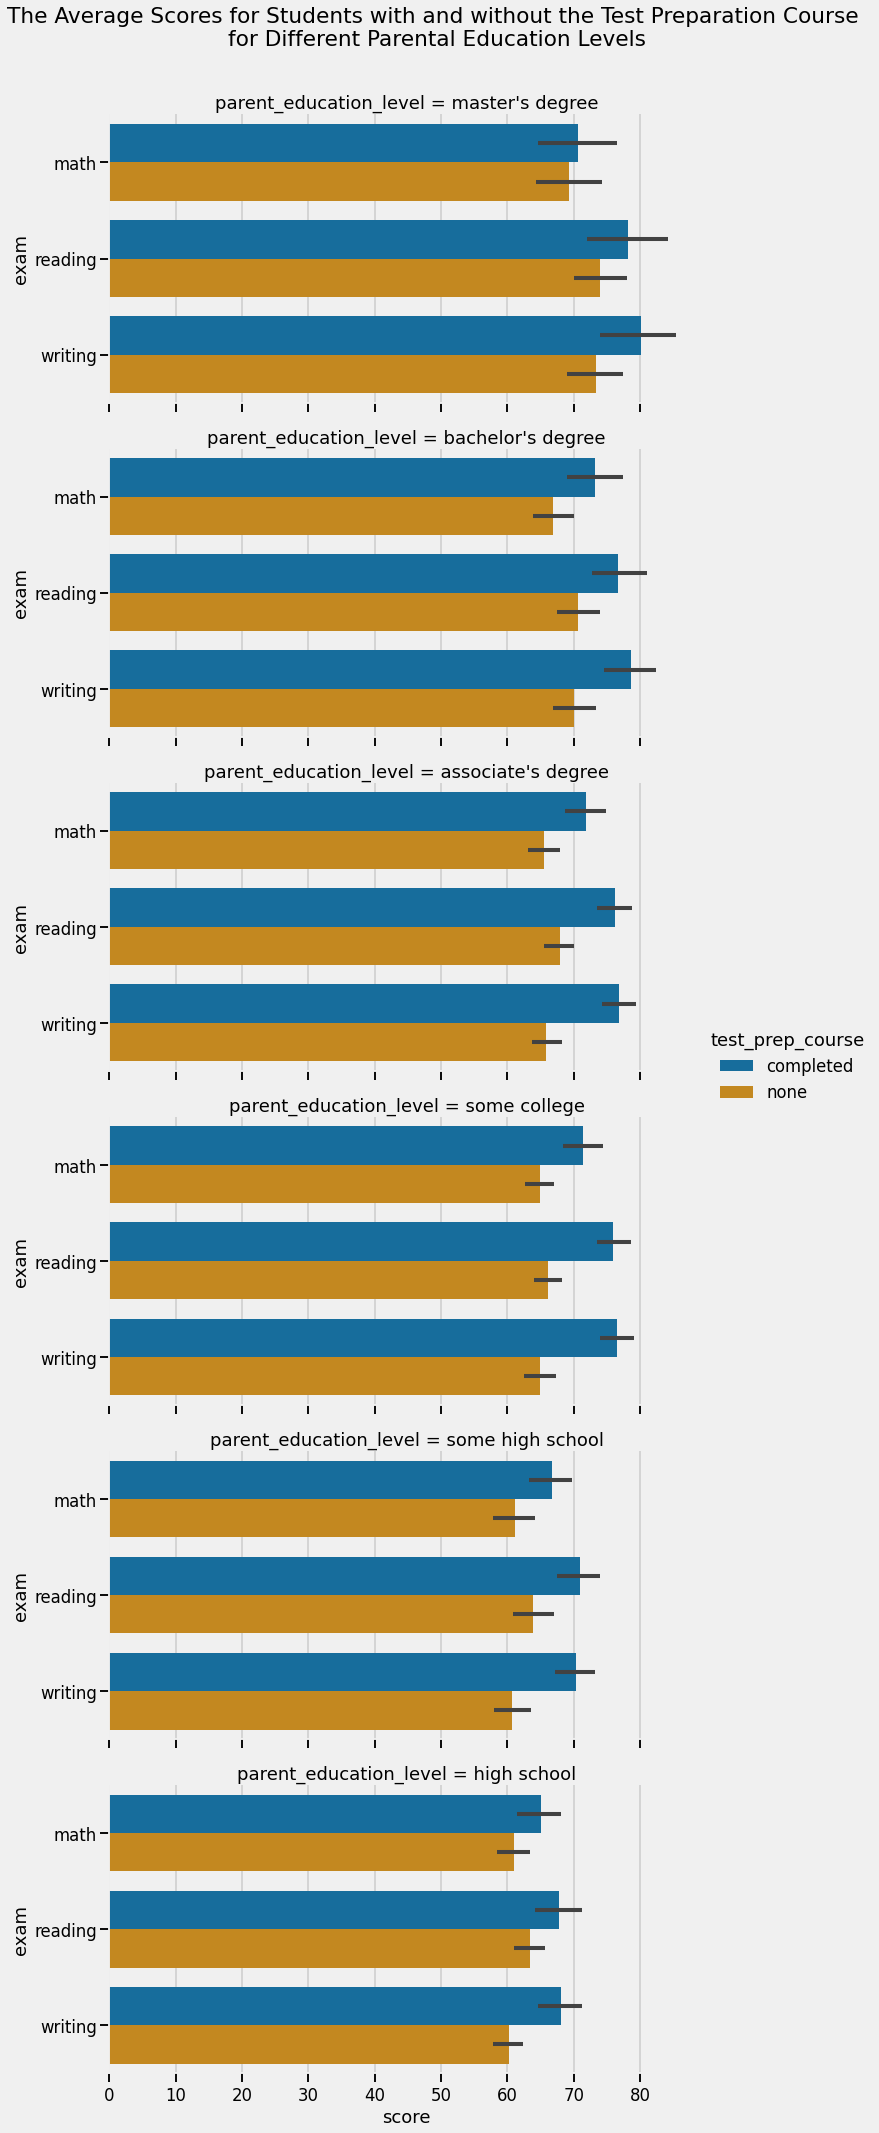

In [13]:
# Create a catplot, we will follow same parent_education_level from previous step
g=sns.catplot(x='score', y='exam', hue='test_prep_course', data=df_scores,  kind='bar',
              row='parent_education_level', hue_order=['completed', 'none'], aspect=2, 
              row_order=["master's degree", "bachelor's degree", "associate's degree", 
                         'some college', 'some high school', 'high school'])

# Set title and adjust its location
g.fig.subplots_adjust(top=0.93)

g.fig.suptitle('The Average Scores for Students with and without the Test Preparation Course \n\
for Different Parental Education Levels')

plt.show()

## 03.05 The principal wants to know if kids who perform well on one subject also score well on the others. Look at the correlations between scores.

The best way to get the corrolation between different exam scores is to calculate and visulaize it, we can use `corr` and `pairplot` to get it.

In [14]:
# Lets see the corrolation values
df.corr()

,math,reading,writing
math,1.000000,0.817580,0.802642
reading,0.817580,1.000000,0.954598
writing,0.802642,0.954598,1.000000


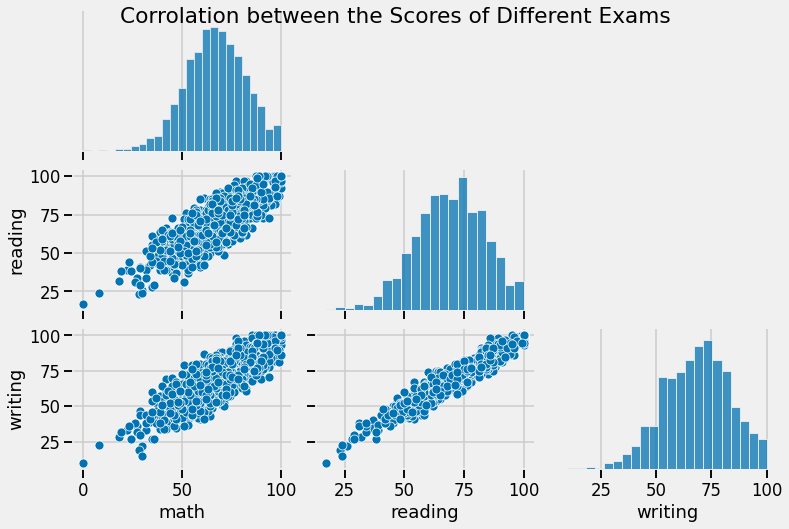

In [15]:
# Let us visualize the corrolation
sns.pairplot(df, aspect=1.5, corner=True
            ).fig.suptitle('Corrolation between the Scores of Different Exams')
plt.show()

# 04 Summarize your findings.

- From all results, it is clearly shown that the students who took the preperation course had more scores than the students who didn't take the preperation course.  
- It is strongly noticed that as parents has a higher education level, there childs got better scores.  
- There is a strong corrolation between the scores of students in the different exams (i.e if student did well in an exam, he will mostly did well in the other two exams.)